# <center>Laboratorium 9<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

***Materiały przygotowujące:***


In [48]:
import main
import numpy as np
import scipy
from scipy import optimize
import matplotlib
import matplotlib.pyplot as plt
import math
#import dill

#expected = dill.load(open('expected','rb'))

#results_bisection = expected['bisection']
#f = results_bisection[12][2]
#a = results_bisection[12][1]

#f(a)

***Temat główny:***

Znajdź miejsca zerowe funkcji: 

f(x) = e^{-2x} + x^2 - 1 
,

metodami:
* Bisekcji,
* Siecznych,
* Newtona

Funkcja i jej pochodne zostały zaimplementowane w *main.py*

***Zadanie 1.***  
Wykonaj wykres funckji oraz jej pierwszej i drugiej pochodnej (obliczonej analitycznie) na jednym rysunku w przedziale pozwalającym na zgrubne określenie miejsc zerowych. Wykres powinien być odpowiednio opisany. Określ przedział miejsca zerowego.

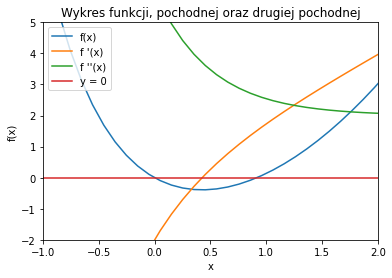

In [49]:
x = np.linspace(-5, 5, 100)
y = main.fun(x)
d = main.dfun(x)
dd = main.ddfun(x)
y0 = 0*x
plt.plot(x, y)
plt.plot(x, d)
plt.plot(x, dd)
plt.plot(x, y0)
plt.xlim([-1, 2])
plt.ylim([-2, 5])
plt.title("Wykres funkcji, pochodnej oraz drugiej pochodnej")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(("f(x)", "f \'(x)", "f \'\'(x)", "y = 0"))
plt.show()

Z wykresu wynika, że jedno miejsce zerowe funkcji znajduje się w okolicy zera, natomiast drugie w okolicy 0.9.

***Zadanie 2.***  
Zaimplementuj [metodę bisekcji](https://en.wikipedia.org/wiki/Bisection_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) funkcja na końcach przedziału przyjmuje przeciwne znaki

***Zadanie 3.***  
Zaimplementuj [metodę siecznych](https://en.wikipedia.org/wiki/Secant_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) Pierwsza i druga pochodna istnieją i są ciągłe w przedziale domkniętym [a,b]

3) funkcja na końcach przedziału przyjmuje przeciwne znaki

4) pierwsza i druga pochodna mają stały znak (brak eksremów lokalnych i punktów przegięcia)


***Zadanie 4.***  
Zaimplementuj [metodę Newtona](https://en.wikipedia.org/wiki/Newton%27s_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) Pierwsza i druga pochodna istnieją i są ciągłe w przedziale domkniętym [a,b]

3) funkcja na końcach przedziału przyjmuje przeciwne znaki

4) pierwsza i druga pochodna mają stały znak (brak eksremów lokalnych i punktów przegięcia)


***Zadania 5.***  
Dla głównej funkcji z zadania 1 znajdź miejsca zerowe przy użyciu:

* funkcji root dostępnej w pakiecie scipy.optimize
* funkcji fsolve dostępnej w pakiecie scipy.optimize


In [50]:
# Funkcja root
root = scipy.optimize.root(main.fun, [0, 1])
print(f"Pierwiastki: {root.x}")

# Funkcja fsolve
fsolve = scipy.optimize.fsolve(main.fun, [0, 1])
print(f"Pierwiastki: {fsolve}")

print(root.x == fsolve)

Pierwiastki: [0.         0.91656258]
Pierwiastki: [0.         0.91656258]
[ True  True]


Znaleziono miejsca zerowe głównej funkcji za pomocą dwóch funkcji z pakietu scipy.optimize: root oraz fsolve. Funkcje te zwracają identyczne wartości.

***Zadanie 6.***  
Dla głównej funkcji oraz przedziału zdefiniowanego z zadania 1 znajdź miejsca zerowe przy użyciu:

* metody bisekcji
* metody siecznych
* metody Newtona

z tolerancją $10^{-10}$

Zbadaj dokładność(względem rozwiązania z zadania 5) i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach. 

Aby wykonać to zadanie, należało podzielić przedział w którym znajdują się oba pierwiastki funkcji na mniejsze przedziały zawierające tylko 1 miejsce zerowe, ponieważ w innym wypadku dwie funkcje (bisection oraz secant) zwracają None (nie jest spełniony warunek o innych znakach na końcach przedziału)

In [51]:
# Metoda bisekcji

root1_bisection, iterations1 = main.bisection(-2, 0.5, main.fun, 1e-10, 100)
root2_bisection, iterations2 = main.bisection(0.5, 2, main.fun, 1e-10, 100)
print(f"Pierwiastek 1: {root1_bisection}")
print(f"Iteracje: {iterations1}")
print(f"Pierwiastek 1: {root2_bisection}")
print(f"Iteracje: {iterations2}")



Pierwiastek 1: -2.9103830456733704e-11
Iteracje: 33
Pierwiastek 1: 0.9165625831228681
Iteracje: 32


In [52]:
# Metoda siecznych

root1_secant, iterations1 = main.secant(-0.25, 0.5, main.fun, 1e-10, 100)
root2_secant, iterations2 = main.secant(0.5, 2, main.fun, 1e-10, 100)
print(f"Pierwiastek 1: {root1_secant}")
print(f"Iteracje: {iterations1}")
print(f"Pierwiastek 1: {root2_secant}")
print(f"Iteracje: {iterations2}")

Pierwiastek 1: 3.047641981879564e-11
Iteracje: 19
Pierwiastek 1: 0.9165625830609662
Iteracje: 29


Również w przypadku metody Newtona należało podzielić przedział na mniejsze podprzedziały (zawierające tylko 1 miejsce zerowe), aby spełnić założenia metody Newtona (pierwsza i druga pochodna mają stały znak na przedziale (a, b)).

In [53]:
# Metoda Newtona

root1_newton, iterations1 = main.newton(main.fun, main.dfun, main.ddfun, -0.25, 0.4, 1e-10, 100)
root2_newton, iterations2 = main.newton(main.fun, main.dfun, main.ddfun, 0.5, 1, 1e-10, 100)
print(f"Pierwiastek 1: {root1_newton}")
print(f"Iteracje: {iterations1}")
print(f"Pierwiastek 2: {root2_newton}")
print(f"Iteracje: {iterations2}")

Pierwiastek 1: -5.2465474697379417e-17
Iteracje: 5
Pierwiastek 2: 0.9165625831056982
Iteracje: 4


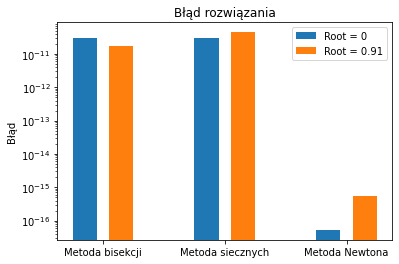

In [99]:
# Porównanie metod

data1 = [np.abs(root1_bisection - root.x[0]), np.abs(root1_secant - root.x[0]), np.abs(root1_newton - root.x[0])]
data2 = [np.abs(root2_bisection - root.x[1]), np.abs(root2_secant - root.x[1]), np.abs(root2_newton - root.x[1])]
labels = ['Metoda bisekcji', 'Metoda siecznych', 'Metoda Newtona']
x = np.arange(len(labels))
_, ax = plt.subplots()
ax.set_xticks(x)
ax.set_xticklabels(labels)
b1 = ax.bar(x - 0.15, data1, 0.2, label='Root = 0')
b2 = ax.bar(x + 0.15, data2, 0.2, label='Root = 0.91')
plt.yscale("log")
plt.ylabel('Błąd')
plt.title('Błąd rozwiązania')
plt.legend()
plt.show()

Aby porównać dokładność trzech zaimplementowanych metod, porównano je z funkcjami root oraz fsolve z pakietu scipy.optimize a następnie przedstawiono je na wykresie słupkowym.

Zdecydowanie najdokładniejszą metodą okazała się być metoda Newtona, która jednocześnie wykonała się po najmniejszej liczbie iteracji. Metoda ta jest najszybciej zbieżna do rozwiązania. Podobną, dużo gorszą dokładność uzyskały zarówno metoda bisekcji jak i metoda siecznych, które do rozwiązania zbiegają dość powoli.

Porównanie czasu wykonywań:

599 ns ± 13 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
688 ns ± 206 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
611 ns ± 111 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 4.11 times longer than the fastest. This could mean that an intermediate result is being cached.
502 ns ± 168 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
468 ns ± 60.1 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
459 ns ± 55.3 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
922 ns ± 218 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
613 ns ± 201 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
641 ns ± 174 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
510 ns ± 151 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
670 ns ± 199 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
466 ns ± 40.5 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
572 ns ± 212 ns 

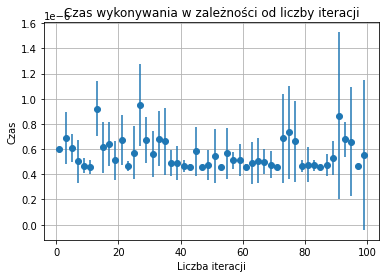

In [104]:
# Metoda bisekcji
error = []
time = []
x = np.arange(1, 100, 2)
for i in x:
    avg_time = %timeit -r 100 -n 100 -o main.bisection(-0.25, 0.5, main.fun, 1e-10, i)
    time.append(avg_time.average)
    error.append(avg_time.stdev)
    
plt.errorbar(x, time, yerr=error, marker="o", linestyle='None')
plt.ylabel("Czas")
plt.xlabel("Liczba iteracji")
plt.title("Czas wykonywania w zależności od liczby iteracji")
plt.grid()
plt.show()

615 ns ± 70.7 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
902 ns ± 71.8 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 4.21 times longer than the fastest. This could mean that an intermediate result is being cached.
545 ns ± 214 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
485 ns ± 99.8 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
479 ns ± 47.6 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 5.12 times longer than the fastest. This could mean that an intermediate result is being cached.
546 ns ± 234 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
615 ns ± 250 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 13.07 times longer than the fastest. This could mean that an intermediate result is being cached.
835 ns ± 589 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 7.08 times longer than the fastest. This cou

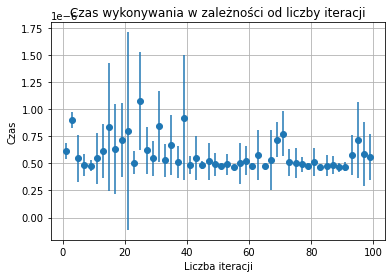

In [100]:
# Metoda siecznych
error = []
time = []
x = np.arange(1, 100, 2)
for i in x:
    avg_time = %timeit -r 100 -n 100 -o main.secant(-0.25, 0.5, main.fun, 1e-10, i)
    time.append(avg_time.average)
    error.append(avg_time.stdev)
    
plt.errorbar(x, time, yerr=error, marker="o", linestyle='None')
plt.ylabel("Czas")
plt.xlabel("Liczba iteracji")
plt.title("Czas wykonywania w zależności od liczby iteracji")
plt.grid()
plt.show()

The slowest run took 4.47 times longer than the fastest. This could mean that an intermediate result is being cached.
2.44 µs ± 1.03 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
1.01 µs ± 153 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
1.19 µs ± 385 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 4.15 times longer than the fastest. This could mean that an intermediate result is being cached.
1.66 µs ± 507 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 4.65 times longer than the fastest. This could mean that an intermediate result is being cached.
2.59 µs ± 1.25 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
2.6 µs ± 1.07 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
2.5 µs ± 800 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 4.41 times longer than the fastest. This could mean that an intermediate result is being cached.
3.14 µs ± 1.27 µ

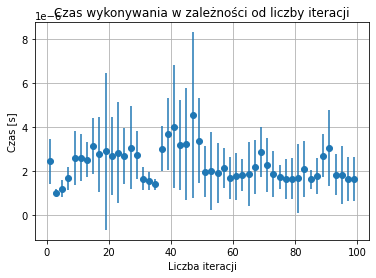

In [79]:
error = []
time = []
x = np.arange(1, 100, 2)
for i in x:
    avg_time = %timeit -r 100 -n 100 -o main.newton(main.fun, main.dfun, main.ddfun, -0.25, 0.2, 1e-10, i)
    time.append(avg_time.average)
    error.append(avg_time.stdev)
    
plt.errorbar(x, time,yerr=error, marker="o", linestyle='None')
plt.ylabel("Czas [s]")
plt.xlabel("Liczba iteracji")
plt.title("Czas wykonywania w zależności od liczby iteracji")
plt.grid()
plt.show()

Metoda Newtona, mimo że dała najlepszy wynik, wykonuje się znacznie dłużej od metody siecznych i bisekcji, które wykonują się w bardzo podobnym czasie. Co dziwne natomiast, czas wykonywania się różnych metod w zależności od ilości iteracji jest mniej więcej stały. Może to wynikać z faktu, że funkcje przerywają liczenie po osiągnięciu zadanej przez nas dokładności.

Wnioski:

Dzięki ćwiczeniom można było zapoznać się z różnymi, numerycznymi metodami znajdowania miejsc zerowych funkcji. Tymi metodami były: metoda bisekcji, metoda siecznych oraz metoda Newtona. Z przeprowadzonych analiz wynika, że najdokładniejszy rezultat daje metoda Newtona, kosztem niestety najdłuższego czasu wykonywania się. Metody bisekcji oraz siecznych były zbliżone zarówno pod względem dokładności, jak i czasu wykonywania. Wynika to z szybkości zbieżności tych metod do rozwiązania.